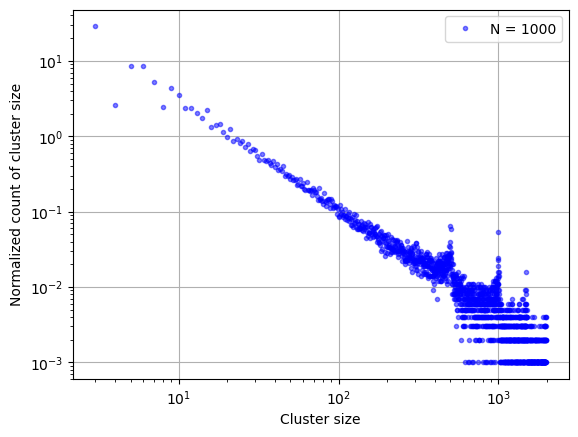

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def add_to_cluster_size_distribution(arr):
    cluster_size_count = Counter()
    current_max = 0
    for num in arr:
        if num != 0:
            current_max += num
        elif current_max != 0:
            cluster_size_count[int(current_max - 1)] += 1
            current_max = 0
    
    # Add the last cluster if it exists
    if current_max != 0:
        cluster_size_count[int(current_max - 1)] += 1
    
    return cluster_size_count

def calc_total_runs_ones(arr):
    total_length = 0
    current_length = 0

    for num in arr:
        if num == 1:
            current_length += 1
        else:
            if current_length > 1:  # Only consider runs longer than 1
                total_length += current_length
            current_length = 0

    # Add the last run if it exists
    if current_length > 1:
        total_length += current_length
    if arr[0]*arr[-1] > 0 and arr[1] == 0 :
        total_length += 1
    if arr[0]*arr[-1] > 0 and arr[-2] == 0 :
        total_length += 1

    return total_length

def min_max_cumulative_sums(arr):
    cumulative_sum = 0
    min_cumulative_sum = float('inf')
    max_cumulative_sum = float('-inf')

    for num in arr:
        cumulative_sum += num
        min_cumulative_sum = min(min_cumulative_sum, cumulative_sum)
        max_cumulative_sum = max(max_cumulative_sum, cumulative_sum)

    return min_cumulative_sum, max_cumulative_sum

def generate_initial_conditions(rho, N):
    ini_1 = np.ones(int(rho*N))
    ini_2 = np.zeros(N - int(rho*N))
    ini = np.concatenate((ini_1, ini_2))
    np.random.shuffle(ini)
    return ini

def cluster_size_distribution(N, rho, trials):
    cluster_size_count = Counter()
    for _ in range(trials):
        ini = generate_initial_conditions(rho, N)
        total_runs_ones = calc_total_runs_ones(ini)
        total_runs_zeros = calc_total_runs_ones(np.ones(len(ini)) - ini)

        switch = 0
        if total_runs_zeros > total_runs_ones:
            switch = 1
        
        if switch == 1:
            ini = np.ones(len(ini)) - ini
            ini = ini[::-1]
        
        mod_ini = 2*ini - np.ones(N)
        mod_ini_double = np.concatenate((mod_ini, mod_ini))
        rev = mod_ini_double[::-1]

        level_func = np.cumsum(rev)
        min_index = np.argmin(level_func)
        actual_min_index = N - (int(min_index)%N) - 1
        rev = np.concatenate((rev[min_index:], rev[:min_index]))
        ini = np.concatenate((ini[actual_min_index:], ini[:actual_min_index]))
        
        total_jammed_cars = total_runs_ones
        pos_min, pos_max = min_max_cumulative_sums(rev)
        
        start_list = [[] for _ in range(int(pos_max - pos_min + 1))]
        micro_jams_store = np.zeros(N)
        posn = 0 - pos_min
        cleared_cars = 0
        i = 0
        
        while cleared_cars < total_jammed_cars:
            posn = int(posn + rev[i])
            if (rev[i%N] == 1 and rev[(i+1)%N] == 1) or (rev[i%N] == 1 and rev[(i-1)%N] == 1):
                start_list[posn].append(i)
            
            if (((rev[i%N] == -1 and rev[(i+1)%N] == -1) or (rev[i%N] == -1 and rev[(i-1)%N] == -1)) and (len(start_list[posn+1]) != 0)):
                if switch == 0:
                    while len(start_list[posn+1]) != 0:
                        pop_index = start_list[posn+1].pop()
                        micro_jams_store[int(N-pop_index)%N] = (i - pop_index-1)/2 +1
                        cleared_cars += 1
                if switch == 1:
                    max_val = float('-inf')
                    while len(start_list[posn+1]) != 0:
                        pop_index = start_list[posn+1].pop()
                        max_val = max(max_val, (i - pop_index-1)/2 + 1)
                    micro_jams_store[int(N - i)%N] = max_val
                    cleared_cars += 1
            i = i + 1
        
        cluster_size_count += add_to_cluster_size_distribution(micro_jams_store)
    
    return cluster_size_count

def plot_cluster_size_distribution(cluster_size_count, N, trials):
    x = [i+1 for i in range(len(cluster_size_count)) if cluster_size_count[i] != 0]
    y = [cluster_size_count[i] / trials for i in range(len(cluster_size_count)) if cluster_size_count[i] != 0]
    x = np.array(x)
    y = np.array(y)
    
    plt.figure()
    plt.loglog(x, y, marker='.', linestyle='none', label=f'N = {N}', alpha=0.5, color='blue')
    plt.xlabel('Cluster size')
    plt.ylabel('Normalized count of cluster size')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

N = 1000
rho = 0.5
trials = 1000

cluster_size_count = cluster_size_distribution(N, rho, trials)
plot_cluster_size_distribution(cluster_size_count, N, trials)


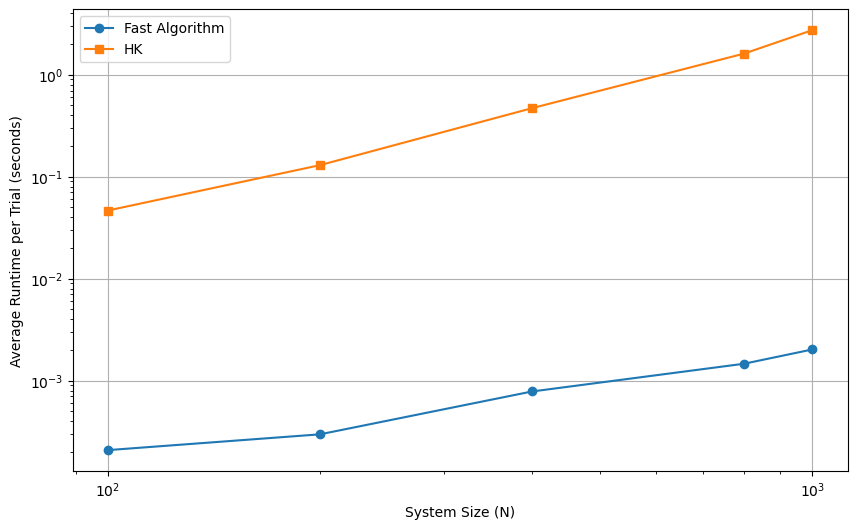

In [1]:
#comparing runtimes:

import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.ndimage import label
from collections import Counter

# Fast algorithm implementation
def add_to_cluster_size_distribution(arr):
    cluster_size_count = Counter()
    current_max = 0
    for num in arr:
        if num != 0:
            current_max += num
        elif current_max != 0:
            cluster_size_count[int(current_max - 1)] += 1
            current_max = 0
    
    # Add the last cluster if it exists
    if current_max != 0:
        cluster_size_count[int(current_max - 1)] += 1
    
    return cluster_size_count

def calc_total_runs_ones(arr):
    total_length = 0
    current_length = 0

    for num in arr:
        if num == 1:
            current_length += 1
        else:
            if current_length > 1:  # Only consider runs longer than 1
                total_length += current_length
            current_length = 0

    # Add the last run if it exists
    if current_length > 1:
        total_length += current_length
    if arr[0]*arr[-1] > 0 and arr[1] == 0 :
        total_length += 1
    if arr[0]*arr[-1] > 0 and arr[-2] == 0 :
        total_length += 1

    return total_length

def min_max_cumulative_sums(arr):
    cumulative_sum = 0
    min_cumulative_sum = float('inf')
    max_cumulative_sum = float('-inf')

    for num in arr:
        cumulative_sum += num
        min_cumulative_sum = min(min_cumulative_sum, cumulative_sum)
        max_cumulative_sum = max(max_cumulative_sum, cumulative_sum)

    return min_cumulative_sum, max_cumulative_sum

def generate_initial_conditions(rho, N):
    ini_1 = np.ones(int(rho*N))
    ini_2 = np.zeros(N - int(rho*N))
    ini = np.concatenate((ini_1, ini_2))
    np.random.shuffle(ini)
    return ini

def cluster_size_distribution_fast(N, rho, trials):
    cluster_size_count = Counter()
    for _ in range(trials):
        ini = generate_initial_conditions(rho, N)
        total_runs_ones = calc_total_runs_ones(ini)
        total_runs_zeros = calc_total_runs_ones(np.ones(len(ini)) - ini)

        switch = 0
        if total_runs_zeros > total_runs_ones:
            switch = 1
        
        if switch == 1:
            ini = np.ones(len(ini)) - ini
            ini = ini[::-1]
        
        mod_ini = 2*ini - np.ones(N)
        mod_ini_double = np.concatenate((mod_ini, mod_ini))
        rev = mod_ini_double[::-1]

        level_func = np.cumsum(rev)
        min_index = np.argmin(level_func)
        actual_min_index = N - (int(min_index)%N) - 1
        rev = np.concatenate((rev[min_index:], rev[:min_index]))
        ini = np.concatenate((ini[actual_min_index:], ini[:actual_min_index]))
        
        total_jammed_cars = total_runs_ones
        pos_min, pos_max = min_max_cumulative_sums(rev)
        
        start_list = [[] for _ in range(int(pos_max - pos_min + 1))]
        micro_jams_store = np.zeros(N)
        posn = 0 - pos_min
        cleared_cars = 0
        i = 0
        
        while cleared_cars < total_jammed_cars:
            posn = int(posn + rev[i])
            if (rev[i%N] == 1 and rev[(i+1)%N] == 1) or (rev[i%N] == 1 and rev[(i-1)%N] == 1):
                start_list[posn].append(i)
            
            if (((rev[i%N] == -1 and rev[(i+1)%N] == -1) or (rev[i%N] == -1 and rev[(i-1)%N] == -1)) and (len(start_list[posn+1]) != 0)):
                if switch == 0:
                    while len(start_list[posn+1]) != 0:
                        pop_index = start_list[posn+1].pop()
                        micro_jams_store[int(N-pop_index)%N] = (i - pop_index-1)/2 +1
                        cleared_cars += 1
                if switch == 1:
                    max_val = float('-inf')
                    while len(start_list[posn+1]) != 0:
                        pop_index = start_list[posn+1].pop()
                        max_val = max(max_val, (i - pop_index-1)/2 + 1)
                    micro_jams_store[int(N - i)%N] = max_val
                    cleared_cars += 1
            i = i + 1
        
        cluster_size_count += add_to_cluster_size_distribution(micro_jams_store)
    
    return cluster_size_count

# Slow algorithm implementation
def rule_184(n, t, ini_array):
    # Initialize the initial configuration with a single '1' in the middle
    initial_config = ini_array

    # Store the configuration for each time step
    configurations = [initial_config]

    # Define Rule 184
    def apply_rule(left, center, right):
        if (left == 1 and center == 1 and right == 1) or (left == 1 and center ==0 and right == 1):
            return 1
        elif (left == 1 and center == 1 and right == 0) or (left == 0 and center == 1 and right == 0):
            return 0
        elif (left == 1 and center == 0 and right == 0) or (left == 0 and center == 1 and right == 1):
            return 1
        elif (left == 0 and center == 0 and right == 1) or (left == 0 and center == 0 and right == 0):
            return 0

    # Apply the rule for T time steps
    for _ in range(t):
        current_config = configurations[-1]
        new_config = [0] * n

        # Apply the rule to update each cell
        for i in range(n):
            left = current_config[(i - 1) % n]  # Periodic boundary conditions
            center = current_config[i]
            right = current_config[(i + 1) % n]  # Periodic boundary conditions

            new_config[i] = apply_rule(left, center, right)

        configurations.append(new_config)

    return configurations

def cluster_size_distribution_slow(N, P, trials, T=250):
    cluster_size_count = Counter()
    for _ in range(trials):
        random_numbers = np.random.rand(N)
        ini_array = np.where(random_numbers < P, 1, 0)
        result = rule_184(N, T, ini_array)
        binary_array = np.array(result)
        lw, num = label(binary_array)
        b = np.unique(lw)
        b = b[b != 0]
        
        for labeler in b:
            cluster_size_count[int(np.count_nonzero(lw == labeler))-1] += 1
    
    return cluster_size_count

# Timing and comparison
N_array = [100, 200, 400, 800, 1000]
P = 0.5
trials = 100

fast_times = []
slow_times = []

for N in N_array:
    start_time = time.time()
    cluster_size_distribution_fast(N, P, trials)
    fast_time = (time.time() - start_time) / trials
    fast_times.append(fast_time)
    
    start_time = time.time()
    cluster_size_distribution_slow(N, P, trials)
    slow_time = (time.time() - start_time) / trials
    slow_times.append(slow_time)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.loglog(N_array, fast_times, label='Fast Algorithm', marker='o')
plt.loglog(N_array, slow_times, label='HK', marker='s')
plt.xlabel('System Size (N)')
plt.ylabel('Average Runtime per Trial (seconds)')
#plt.title('Comparison of Fast and Slow Algorithms for Cluster Size Distribution')
plt.legend()
plt.grid(True)
plt.show()


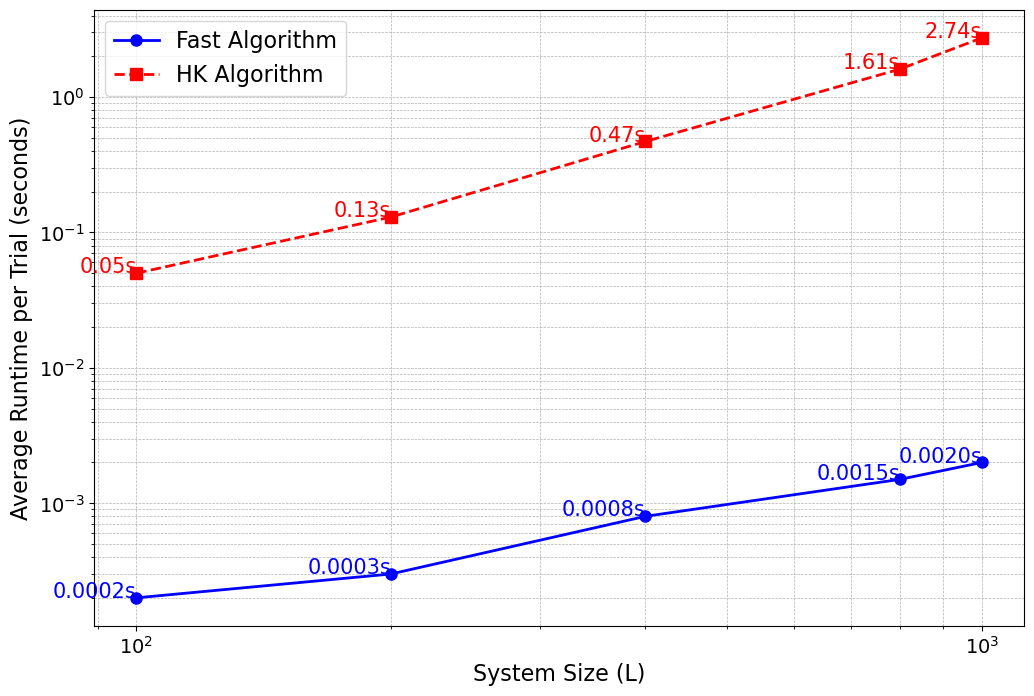

In [1]:
import matplotlib.pyplot as plt
# Plotting the results
plt.figure(figsize=(12, 8))

N_array = [100, 200, 400, 800, 1000]
# Enhanced log-log plot
plt.loglog(N_array, fast_times, label='Fast Algorithm', marker='o', markersize=8, linewidth=2, linestyle='-', color='blue')
plt.loglog(N_array, slow_times, label='HK Algorithm', marker='s', markersize=8, linewidth=2, linestyle='--', color='red')

# Labels and title
plt.xlabel('System Size (L)', fontsize=16)
plt.ylabel('Average Runtime per Trial (seconds)', fontsize=16)
plt.xticks(fontsize=14)  # Bigger font size for x-axis ticks
plt.yticks(fontsize=14)  # Bigger font size for y-axis ticks
#plt.title('Runtime Comparison of Fast Algorithm vs HK Algorithm', fontsize=16)

# Legend and grid
plt.legend(fontsize=16)
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Minor ticks
plt.minorticks_on()

# Annotating data points
for n, f, s in zip(N_array, fast_times, slow_times):
    plt.text(n, f, f"{f:.4f}s", fontsize=15, color='blue', ha='right')
    plt.text(n, s, f"{s:.2f}s", fontsize=15, color='red', ha='right')

# Display the plot
plt.show()

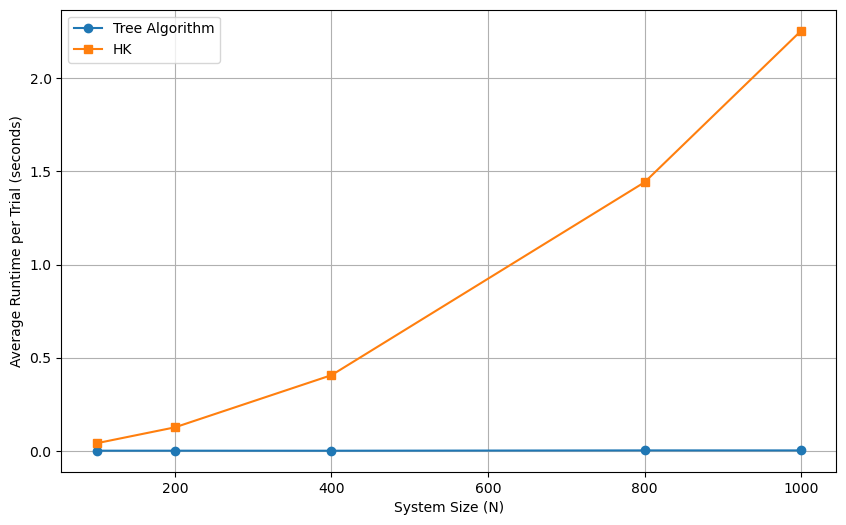

In [5]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(N_array, fast_times, label='Tree Algorithm', marker='o')
plt.plot(N_array, slow_times, label='HK', marker='s')
plt.xlabel('System Size (N)')
plt.ylabel('Average Runtime per Trial (seconds)')
#plt.title('Comparison of Fast and Slow Algorithms for Cluster Size Distribution')
plt.legend()
plt.grid(True)
plt.show()

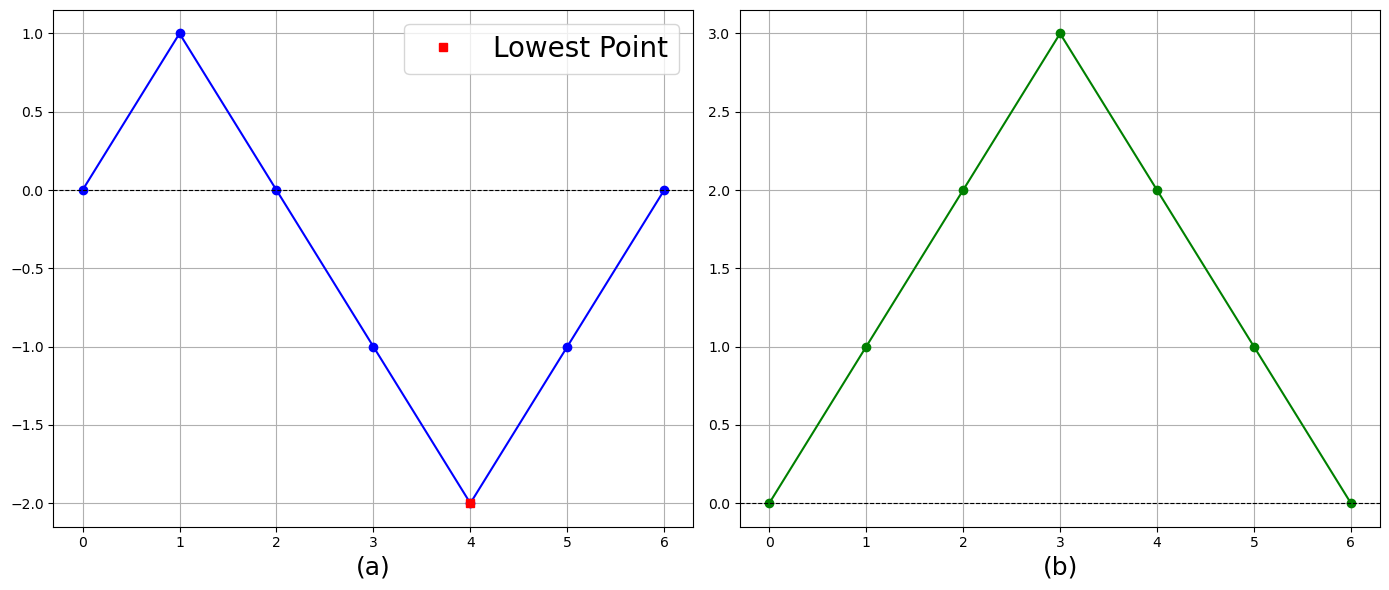

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define the input sequence
initial_sequence = [1, 1, 0, 0, 0, 1]

# Step 2: Replace 0 with -1 and 1 with +1
transformed_sequence = [1 if x == 1 else -1 for x in initial_sequence]

# Step 3: Reverse the transformed sequence
reversed_sequence = list(reversed(transformed_sequence))

# Step 4: Construct the random walk, starting at 0
cumulative_sum = np.cumsum([0] + reversed_sequence)

# Step 5: Identify the lowest point and cyclically rotate the sequence
lowest_index = np.argmin(cumulative_sum)
rotated_sequence = np.roll(reversed_sequence, -lowest_index)

# Step 6: Construct the Dyck path, starting at 0
dyck_path = np.cumsum([0] + list(rotated_sequence))

# Plotting the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Fig 1: Random walk graph starting at 0
ax1.plot(range(len(cumulative_sum)), cumulative_sum, marker='o', linestyle='-', color='blue')
#ax1.set_title('Random Walk Graph (Starting at 0)', fontsize=14)
ax1.set_xlabel('(a)', fontsize=18)
#ax1.set_ylabel('Cumulative Sum', fontsize=12)
ax1.axhline(0, color='black', linestyle='--', linewidth=0.8)
ax1.plot(lowest_index, cumulative_sum[lowest_index], 'rs', label='Lowest Point')
ax1.legend(fontsize=20)
ax1.grid(True)

# Fig 2: Dyck path after cyclic permutation, starting at 0
ax2.plot(range(len(dyck_path)), dyck_path, marker='o', linestyle='-', color='green')
#ax2.set_title('Dyck Path (Cyclic Permutation, Starting at 0)', fontsize=14)
ax2.set_xlabel('(b)', fontsize=18)
#ax2.set_ylabel('Cumulative Sum', fontsize=12)
ax2.axhline(0, color='black', linestyle='--', linewidth=0.8)
ax2.grid(True)

# Show the figures
plt.tight_layout()
plt.show()
